In [31]:

# Import Libraries:
import coinmetrics # Coinmetrics API
from datetime import datetime, timedelta # Datetime Feature
import pandas as pd # Import Pandas
import panel as pn # Import Panel
import plotly.express as px # Import Plotly
pn.extension("plotly")# Import Plotly Extension
from pprint import pprint
import requests
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go


# Initialize a reference object (in this case `cm` for the Coinmetrics Community API)
cm = coinmetrics.Community()

In [32]:
# API INPUTS
asset = "btc"
begin_timestamp = (datetime.now() - timedelta(days=90)).date()
end_timestamp = (datetime.now() - timedelta(days=0)).date()
# end_timestamp = datetime.now().date()


# API OUTPUT
# asset_data = requests.get(f"https://community-api.coinmetrics.io/v4/timeseries/market-candles?start_time={begin_timestamp}&paging_from=start&markets=coinbase-{asset}-usd-spot&pretty=true").json()
asset_data = requests.get(f"https://community-api.coinmetrics.io/v4/timeseries/market-candles?start_time={begin_timestamp}&end_time={end_timestamp}&paging_from=start&markets=coinbase-{asset}-usd-spot&pretty=true").json()


In [33]:
# Initiate clean dictionary
data_dictionary = {
    "date" : [],
    "open" : [],
    "close" : [],
    "high" : [],
    "low" : [],
    "volume" : [],
    "vwap" : [], 
}

# Use For Loop to interate through data into dictionary
for entry in asset_data['data']:
    data_dictionary['date'].append(entry['time'])
    data_dictionary['open'].append(float(entry['price_open']))
    data_dictionary['close'].append(float(entry['price_close']))
    data_dictionary['high'].append(float(entry['price_high']))
    data_dictionary['low'].append(float(entry['price_low']))
    data_dictionary['volume'].append(float(entry['volume']))
    data_dictionary['vwap'].append(float(entry['vwap']))


    
#     {'data': [{'candle_trades_count': '301135',
#            'candle_usd_volume': '547725314.072704441370172316698874',
#            'market': 'coinbase-btc-usd-spot',
#            'price_close': '47833.64',
#            'price_high': '47953.9',
#            'price_low': '44249.64',
#            'price_open': '44422.15',
#            'time': '2021-08-13T00:00:00.000000000Z',
#            'volume': '11794.94196257',
#            'vwap': '46437.30472018029'},

asset_data_df = pd.DataFrame.from_dict(data_dictionary)
pd.options.display.float_format = "{:,.2f}".format
# INSERT HERE >>> FIND WAY TO CLEAN DATE DATA
asset_data_df.tail()

,date,open,close,high,low,volume,vwap
86,2021-11-12T00:00:00.000000000Z,"64,807.73","64,147.90","65,477.06","62,300.00","13,658.63","63,864.65"
87,2021-11-13T00:00:00.000000000Z,"64,144.42","64,400.01","64,990.00","63,394.17","5,968.10","64,159.70"
88,2021-11-14T00:00:00.000000000Z,"64,400.01","65,505.02","65,525.00","63,596.90","6,081.57","64,515.20"
89,2021-11-15T00:00:00.000000000Z,"65,505.03","63,624.59","66,339.90","63,371.00","10,426.56","64,753.40"
90,2021-11-16T00:00:00.000000000Z,"63,621.05","60,107.98","63,624.60","58,638.00","24,910.15","60,821.42"


In [34]:
bb_df= asset_data_df

In [35]:
#Calculate simple moving average 
def sma(data, window):
    return(data.rolling(window = window).mean()) #finding the 20 day simple moving average 
sma(bb_df['close'], window = 20)

bb_df['sma'] = sma(bb_df['close'],20)
bb_df.tail()

,date,open,close,high,low,volume,vwap,sma
86,2021-11-12T00:00:00.000000000Z,"64,807.73","64,147.90","65,477.06","62,300.00","13,658.63","63,864.65","62,582.67"
87,2021-11-13T00:00:00.000000000Z,"64,144.42","64,400.01","64,990.00","63,394.17","5,968.10","64,159.70","62,759.95"
88,2021-11-14T00:00:00.000000000Z,"64,400.01","65,505.02","65,525.00","63,596.90","6,081.57","64,515.20","62,881.02"
89,2021-11-15T00:00:00.000000000Z,"65,505.03","63,624.59","66,339.90","63,371.00","10,426.56","64,753.40","63,045.37"
90,2021-11-16T00:00:00.000000000Z,"63,621.05","60,107.98","63,624.60","58,638.00","24,910.15","60,821.42","63,128.00"


In [36]:
#Calculate the upper and lower bands 
def bb(data, sma, window):
    
    std = data.rolling(window=window).std() #finding how far the standard deviation is away from the mean 
    
# bollinger bands = simple moving average +- two standard deviations away

    upper_band = sma + std * 2 #creating the top band
    lower_band = sma -std * 2 #creating the lower band
    return upper_band, lower_band
bb_df['upper_band'],bb_df['lower_band'] = bb(bb_df['close'], bb_df['sma'],20)
bb_df.tail()

,date,open,close,high,low,volume,vwap,sma,upper_band,lower_band
86,2021-11-12T00:00:00.000000000Z,"64,807.73","64,147.90","65,477.06","62,300.00","13,658.63","63,864.65","62,582.67","67,092.65","58,072.70"
87,2021-11-13T00:00:00.000000000Z,"64,144.42","64,400.01","64,990.00","63,394.17","5,968.10","64,159.70","62,759.95","67,262.62","58,257.28"
88,2021-11-14T00:00:00.000000000Z,"64,400.01","65,505.02","65,525.00","63,596.90","6,081.57","64,515.20","62,881.02","67,547.58","58,214.47"
89,2021-11-15T00:00:00.000000000Z,"65,505.03","63,624.59","66,339.90","63,371.00","10,426.56","64,753.40","63,045.37","67,563.95","58,526.80"
90,2021-11-16T00:00:00.000000000Z,"63,621.05","60,107.98","63,624.60","58,638.00","24,910.15","60,821.42","63,128.00","67,343.45","58,912.55"


In [37]:
#Setting the date as the Index
bb_df.dropna(inplace=True)
bb_df = bb_df.set_index(pd.DatetimeIndex(bb_df['date']))


In [38]:
#Finding the buy and sell prices
def signals(data, lower_band, upper_band):
    buy_price = [] #the closing price at which to buy
    sell_price = [] #the sell price at which to sell 
    signal = 0
    bb_signal = [] #creating a list that signals when to buy(1) and sell(-1) 

#if there is no action taken the price will NaN with a signal of zero    

    for i in range(len(data)):
        
        if bb_df['close'][i] < bb_df['lower_band'][i]: #when the closing price is less than the lower band creates a buy price
            if signal != 1:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
           
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                signal = 0
                bb_signal.append(0)
            
        elif bb_df['close'][i] > bb_df['upper_band'][i]: #when the the closing price is more than the upper band creates a sell price
            if signal !=-1:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
            
            else: 
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                signal = 0
                bb_signal.append(0)
        
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
        
    return buy_price, sell_price, bb_signal
   
    

        

bb_df['buy_price'],bb_df['sell_price'],bb_df['bb_signal'] = signals(bb_df['close'], bb_df['lower_band'], bb_df['upper_band'])

In [39]:
bb_df.tail(30)

,date,open,close,high,low,volume,vwap,sma,upper_band,lower_band,buy_price,sell_price,bb_signal
date,,,,,,,,,,,,,
2021-10-18 00:00:00+00:00,2021-10-18T00:00:00.000000000Z,"61,530.07","62,042.41","62,675.19","59,887.74","19,798.15","61,685.42","53,862.96","65,696.55","42,029.37",NaN,NaN,0
2021-10-19 00:00:00+00:00,2021-10-19T00:00:00.000000000Z,"62,042.40","64,303.14","64,500.00","61,333.00","17,380.30","63,009.69","55,002.01","66,202.71","43,801.31",NaN,NaN,0
2021-10-20 00:00:00+00:00,2021-10-20T00:00:00.000000000Z,"64,303.14","66,026.54","66,999.00","63,525.00","19,194.45","65,711.10","56,112.12","67,046.08","45,178.15",NaN,NaN,0
2021-10-21 00:00:00+00:00,2021-10-21T00:00:00.000000000Z,"66,021.26","62,204.02","66,650.85","62,050.00","23,474.39","64,203.69","56,814.03","67,396.86","46,231.19",NaN,NaN,0
2021-10-22 00:00:00+00:00,2021-10-22T00:00:00.000000000Z,"62,204.01","60,687.64","63,750.00","60,000.00","17,217.71","61,789.75","57,465.53","67,249.08","47,681.97",NaN,NaN,0
2021-10-23 00:00:00+00:00,2021-10-23T00:00:00.000000000Z,"60,682.88","61,300.01","61,750.00","59,650.00","6,708.15","61,061.36","58,118.83","67,011.24","49,226.41",NaN,NaN,0
2021-10-24 00:00:00+00:00,2021-10-24T00:00:00.000000000Z,"61,300.02","60,854.48","61,491.96","59,522.89","8,573.73","60,500.61","58,699.27","66,614.83","50,783.71",NaN,NaN,0
2021-10-25 00:00:00+00:00,2021-10-25T00:00:00.000000000Z,"60,847.91","63,083.54","63,726.58","60,653.50","10,496.58","62,748.67","59,278.75","66,651.62","51,905.88",NaN,NaN,0
2021-10-26 00:00:00+00:00,2021-10-26T00:00:00.000000000Z,"63,081.96","60,337.62","63,290.49","59,837.07","12,181.48","61,802.59","59,528.66","66,674.66","52,382.65",NaN,NaN,0


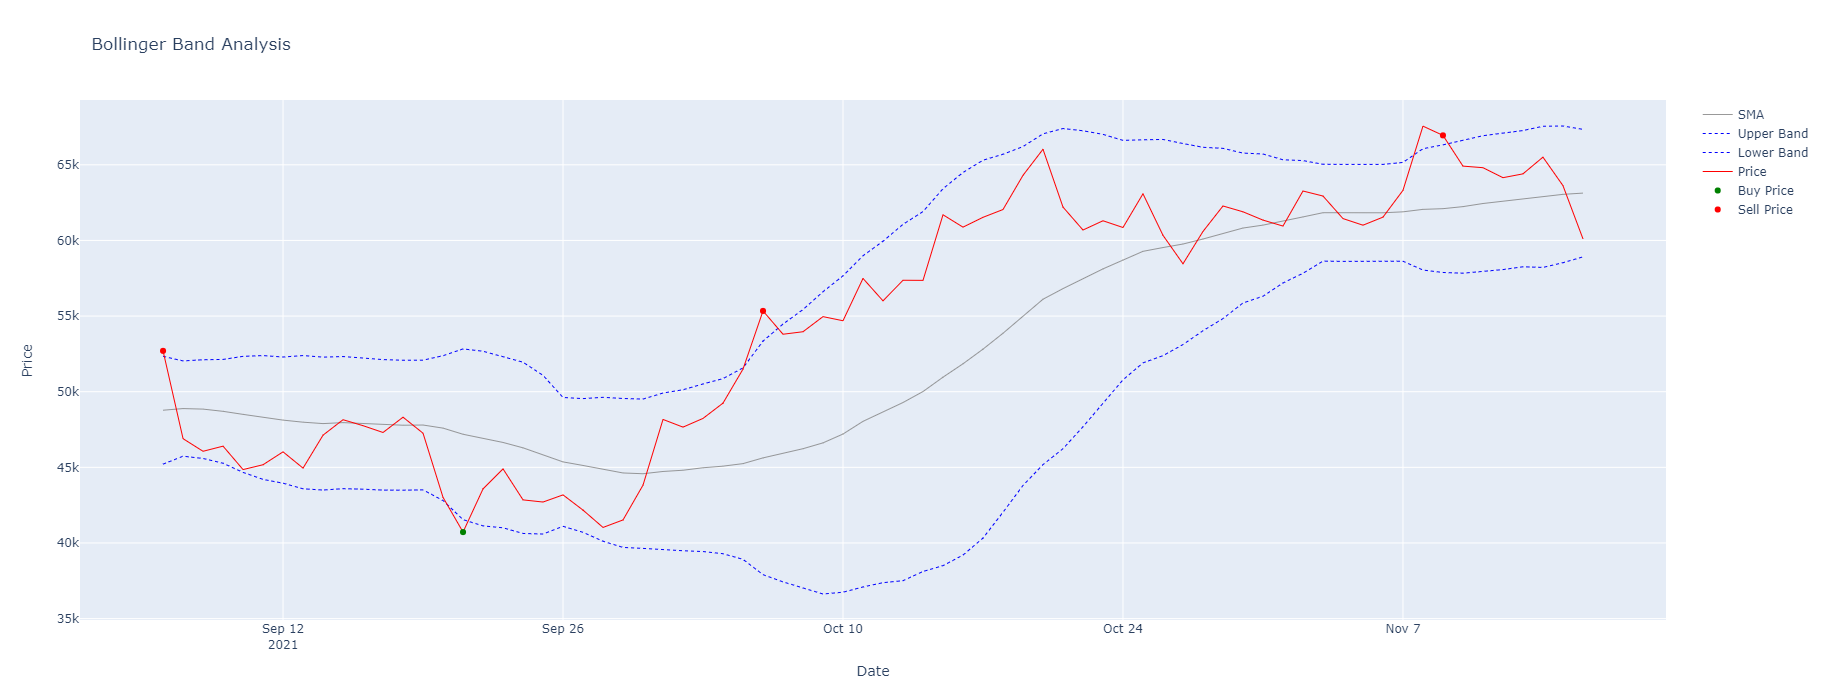

In [40]:
fig = go.Figure()


fig.add_trace(go.Scatter(x=bb_df.index, y= bb_df['sma'], line=dict (color='grey', width=.8), name = 'SMA')) #creates a line on the graph in grey of the simple moving average
fig.add_trace(go.Scatter(x=bb_df.index, y= bb_df['upper_band'], line=dict (color='blue', width=1, dash='dot'), name = 'Upper Band')) #creates an upper band with a blue dotted line
fig.add_trace(go.Scatter(x=bb_df.index, y= bb_df['lower_band'], line=dict (color='blue', width=1, dash='dot'), name = 'Lower Band')) #creates a lower band with a blue dotted line
fig.add_trace(go.Scatter(x=bb_df.index, y= bb_df['close'], line=dict (color='red', width=1), name = 'Price')) #creates a red line on the graph showing the closing prices


fig.add_trace(go.Scatter(x=bb_df.index, y=bb_df['buy_price'],mode='markers',marker=dict(color='Green'),name='Buy Price')) #creates a green marker on the graph where to buy

fig.add_trace(go.Scatter(x=bb_df.index, y=bb_df['sell_price'], mode='markers',marker=dict(color='Red'), name='Sell Price')) #creates a red marker on the graph where to sell


#fig.add_trace(go.Candlestick(x=df.index, open= df['open'],high=df['high'], low= df['low'], close=df['close'], name = 'Price'))


fig.update_layout(title='Bollinger Band Analysis',xaxis_title='Date',yaxis_title='Price', height=700) #Height allows you to change how big the grapgh is 





fig.show()
